# [인천 유나이티드 고객 세분화 및 재예매 고객 예측 프로젝트]

## 개요

한국의 프로스포츠 산업은 막대한 금액의 중계권 판매 수익을 얻는 미국과 유럽에 비해 낮은 수준의 중계권료 수익을 얻기에 관중 동원력이 중요한 재원이이다. 경기장을 찾는 관중 중에서도 일회성이 아닌 반복 예매를 통해 꾸준하게 경기장을 찾는 팬의 중요성이 매우 높다. Reichheld & Sasser의 연구에서는 기존의 스포츠 팬을 유지하는 것은 새로운 스포츠 팬을 유치하는 것보다 비용이 적게 들며 기하급수적인 매출의 상승 또한 도모할 수 있게 한다는 결과를 보여주기도 한 것 처럼 충성도 높은 팬을 유지하는 것이 비용대비 최대의 수익을 창출할 수 있는 주요 방법이라 할 수 있다. 

본 프로젝트는 한국 K리그 인천 유나이티드의 고객데이터를 활용하여 고객 세분화로 그룹을 나누어 고객의 특성을 확인하고 분류 모델을 통해서 일회성 예매 고객과 재예매 고객을 예측할 수 있게 하고자 한다.

이를 통해서 충성 고객층을 유지, 확장하는 방안을 모색하고 추가적인 시각화로 다양한 프로모션의 근거를 마련하는 목표를 가지고 있다.




# 0. 데이터 정리

cp2_data에서 정제한 데이터를 불러와 다시 한번 정리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
myfile = files.upload()

Saving df_reserve_member.csv to df_reserve_member.csv


In [ ]:
df = pd.read_csv('df_reserve_member.csv')
df = df.sample(frac=1)  # row 전체 shuffle
df = df.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
df

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result,salary,rebooking
0,136955,32,회사원(제조/건설/기술직),2022-09-14,일반석,성인,4,울산 현대축구단,D,14701814,1
1,130732,34,회사원(사무직/연구직),2022-05-08,일반석,성인,4,전북 현대모터스,L,17802511,0
2,105272,46,기타,2022-05-17,일반석,할인혜택,3,대구FC,D,8188735,1
3,150286,46,기타,2022-09-14,테이블석,할인혜택,4,울산 현대축구단,D,14701814,0
4,145774,49,자영업자,2022-05-29,일반석,청소년/어린이,4,성남FC,W,6024246,1
...,...,...,...,...,...,...,...,...,...,...,...
25649,138716,43,기타,2022-10-16,일반석,성인,4,포항 스틸러스,D,8433234,1
25650,149355,17,학생(초/중/고),2022-08-27,일반석,청소년/어린이,3,FC서울,W,8278177,1
25651,149561,45,보건 및 의료종사자,2022-08-13,일반석,성인,4,전북 현대모터스,W,17802511,1
25652,123713,33,대학생(대학원생 포함),2022-04-10,일반석,성인,2,제주 유나이티드,D,9884271,1


In [ ]:
df['game_date'] = pd.to_datetime(df['game_date'])
df['weekday'] = df['game_date'].dt.weekday # 요일 특성 추가가
df = df.drop(['salary'], axis=1) # match_info 대신 salary 삭제 
df

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result,rebooking,weekday
0,136955,32,회사원(제조/건설/기술직),2022-09-14,일반석,성인,4,울산 현대축구단,D,1,2
1,130732,34,회사원(사무직/연구직),2022-05-08,일반석,성인,4,전북 현대모터스,L,0,6
2,105272,46,기타,2022-05-17,일반석,할인혜택,3,대구FC,D,1,1
3,150286,46,기타,2022-09-14,테이블석,할인혜택,4,울산 현대축구단,D,0,2
4,145774,49,자영업자,2022-05-29,일반석,청소년/어린이,4,성남FC,W,1,6
...,...,...,...,...,...,...,...,...,...,...,...
25649,138716,43,기타,2022-10-16,일반석,성인,4,포항 스틸러스,D,1,6
25650,149355,17,학생(초/중/고),2022-08-27,일반석,청소년/어린이,3,FC서울,W,1,5
25651,149561,45,보건 및 의료종사자,2022-08-13,일반석,성인,4,전북 현대모터스,W,1,5
25652,123713,33,대학생(대학원생 포함),2022-04-10,일반석,성인,2,제주 유나이티드,D,1,6


In [ ]:
df['product_grade_name'] = df['product_grade_name'].replace({'일반석': 0, '테이블석': 1, '고급석' : 2})
df['product_denomination_name'] = df['product_denomination_name'].replace({'성인' : 0, '청소년/어린이' : 1, '할인혜택' : 2})
df['result'] = df['result'].replace({'L' : 0, 'D' : 1, 'W' : 2})
df = df.rename(columns = {'product_grade_name' : 'grade', 'product_denomination_name' : 'denomination'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25654 entries, 0 to 25653
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   membership_no  25654 non-null  int64         
 1   age            25654 non-null  int64         
 2   job            25654 non-null  object        
 3   game_date      25654 non-null  datetime64[ns]
 4   grade          25654 non-null  int64         
 5   denomination   25654 non-null  int64         
 6   ranking        25654 non-null  int64         
 7   match_info     25654 non-null  object        
 8   result         25654 non-null  int64         
 9   rebooking      25654 non-null  int64         
 10  weekday        25654 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 2.2+ MB


# 1. Clustering

22년도 예매 데이터를 기반으로 특정 특성들을 통해서 고객의 그룹을 나누는 KMeans Clustering 진행 

- 특성

    a. 가장 마지막 예매일을 기준으로 예매 간 가장 짧은 기간 : recency<br/>
    b. 연간 총 예매 횟수 : reserve_count<br/>
    c. 나이 : age

In [ ]:
# recency

df['game_date'] = pd.to_datetime(df['game_date'])

# 해당 데이터셋의 마지막 예매 일자 확인
max_date = max(df['game_date'])

# 각 데이터별 예매 일자 경과 확인
df['recency'] = max_date - df['game_date']

# 고객별로 요약
df_recency = df.groupby('membership_no', as_index=False)['recency'].min()

df_recency

,membership_no,recency
0,137,140 days
1,153,0 days
2,180,0 days
3,208,0 days
4,291,0 days
...,...,...
7422,151972,0 days
7423,151978,0 days
7424,151980,0 days
7425,151981,0 days


In [ ]:
# reserve_count, age
# 회원별로 예매 횟수 계산
reserve_per_member = df.groupby("membership_no").size().reset_index(name='reserve_count')

df_temp = df.merge(reserve_per_member, on='membership_no')

df_temp = df_temp[['membership_no', 'reserve_count', 'age']]

df_temp

,membership_no,reserve_count,age
0,136955,21,32
1,136955,21,32
2,136955,21,32
3,136955,21,32
4,136955,21,32
...,...,...,...
25649,151667,1,48
25650,128122,1,28
25651,141780,1,36
25652,149967,1,29


In [ ]:
df_clust = pd.merge(df_recency, df_temp, on = 'membership_no')
df_clust = df_clust.drop_duplicates()
df_clust = df_clust.set_index(keys='membership_no')
df_clust

,recency,reserve_count,age
membership_no,,,
137,140 days,1,40
153,0 days,11,65
180,0 days,2,40
208,0 days,23,31
291,0 days,33,32
...,...,...,...
151972,0 days,1,43
151978,0 days,1,32
151980,0 days,1,25


In [ ]:
df_clust['recency'] = df_clust['recency'].astype('int64') / 10**9 / 60 / 60 / 24
print(df_clust.info())
df_clust

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7427 entries, 137 to 151984
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        7427 non-null   float64
 1   reserve_count  7427 non-null   int64  
 2   age            7427 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 232.1 KB
None


<ipython-input-9-803c93e1513f>:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_clust['recency'] = df_clust['recency'].astype('int64') / 10**9 / 60 / 60 / 24


,recency,reserve_count,age
membership_no,,,
137,140.0,1,40
153,0.0,11,65
180,0.0,2,40
208,0.0,23,31
291,0.0,33,32
...,...,...,...
151972,0.0,1,43
151978,0.0,1,32
151980,0.0,1,25


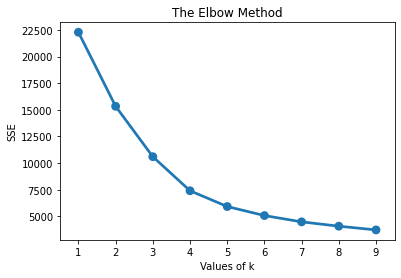

In [ ]:
# The Elbow Method를 통해 정정k(그룹 수) 설정 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
df_clust_scaled = scaler.fit_transform(df_clust)

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_clust_scaled)
  sse[k] = kmeans.inertia_

# 결과 시각화

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(df_clust_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

df_k4 = df_clust.assign(Cluster = cluster_labels)

df_k4

,recency,reserve_count,age,Cluster
membership_no,,,,
137,140.0,1,40,2
153,0.0,11,65,3
180,0.0,2,40,3
208,0.0,23,31,1
291,0.0,33,32,1
...,...,...,...,...
151972,0.0,1,43,3
151978,0.0,1,32,0
151980,0.0,1,25,0


In [ ]:
print(f'[cluster 그룹 별 인원 수]')
print(df_k4.Cluster.value_counts())
print(f'[cluster 그룹 별 특성]')
cluster_avg = df_k4.groupby(['Cluster']).mean()
cluster_avg

[cluster 그룹 별 인원 수]
0    2414
3    2304
2    2160
1     549
Name: Cluster, dtype: int64
[cluster 그룹 별 특성]


,recency,reserve_count,age
Cluster,,,
0,33.708368,2.475973,26.867026
1,4.140255,16.699454,38.661202
2,191.551389,1.525926,34.885185
3,34.625434,3.130642,45.240017


cluster 1 : recency 평균이 4일이므로 최근 경기를 매주 와서 보고 연 예매 평균도 약 17회 이므로 충성 고객층으로 분류 -> 시즌권, 예매권북 이용 고객일 것이며 관리 대상이 되어야 함. <br/>
cluster 0, 3 : 한달 기간으로 예매를 했으며 시즌당 3번 정도 경기를 보는 일반 고객층이며 청년층과 장년층으로 나뉨을 알 수 있음. <br/>
cluster 2 : 예매 간격이 길고 시즌당 1~2회 정도 경기를 보는 일회성 고객으로 판단.

# 2. 로지스틱 회귀

분류 문제를 해결하기 위해 로지스틱 회귀 모델델을 진행 <br/>
기본 모델을 확인 후 타겟 클래스 불균형 문제 해결을 통해 더 나은 결과가 나타나는지 확인하고자 함.<br/><br/>

가설 : 인천유나이티드 경기 예매 데이터를 통해 고객 그룹이 나이, 직업, 이전 경기 결과에 따라 재예매를 하는 데에 유의미한 차이를 보일 것이다

## 2-1 기본

In [ ]:
df_logistic = pd.merge(df, df_k4, on = 'membership_no')
df_logistic

,membership_no,age_x,job,game_date,grade,denomination,ranking,match_info,result,rebooking,weekday,recency_x,recency_y,reserve_count,age_y,Cluster
0,136955,32,회사원(제조/건설/기술직),2022-09-14,0,0,4,울산 현대축구단,1,1,2,32 days,0.0,21,32,1
1,136955,32,회사원(제조/건설/기술직),2022-02-26,0,2,4,FC서울,1,1,5,232 days,0.0,21,32,1
2,136955,32,회사원(제조/건설/기술직),2022-02-26,0,0,4,FC서울,1,1,5,232 days,0.0,21,32,1
3,136955,32,회사원(제조/건설/기술직),2022-07-06,0,0,5,수원FC,0,1,2,102 days,0.0,21,32,1
4,136955,32,회사원(제조/건설/기술직),2022-04-10,0,0,2,제주 유나이티드,1,1,6,189 days,0.0,21,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25649,151667,48,회사원(사무직/연구직),2022-10-11,0,2,4,제주 유나이티드,2,0,1,5 days,5.0,1,48,3
25650,128122,28,기타,2022-02-26,0,0,4,FC서울,1,0,5,232 days,232.0,1,28,2
25651,141780,36,회사원(제조/건설/기술직),2022-04-02,0,0,2,울산 현대축구단,1,0,5,197 days,197.0,1,36,2
25652,149967,29,자영업자,2022-08-27,0,2,3,FC서울,2,0,5,50 days,50.0,1,29,0


In [ ]:
df_logistic = df_logistic.drop(['membership_no', 'game_date', 'recency_x', 'recency_y', 'age_y', 'reserve_count'], axis=1) 
df_logistic = df_logistic.rename(columns = {'age_x' : 'age'})
df_logistic

,age,job,grade,denomination,ranking,match_info,result,rebooking,weekday,Cluster
0,32,회사원(제조/건설/기술직),0,0,4,울산 현대축구단,1,1,2,1
1,32,회사원(제조/건설/기술직),0,2,4,FC서울,1,1,5,1
2,32,회사원(제조/건설/기술직),0,0,4,FC서울,1,1,5,1
3,32,회사원(제조/건설/기술직),0,0,5,수원FC,0,1,2,1
4,32,회사원(제조/건설/기술직),0,0,2,제주 유나이티드,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...
25649,48,회사원(사무직/연구직),0,2,4,제주 유나이티드,2,0,1,3
25650,28,기타,0,0,4,FC서울,1,0,5,2
25651,36,회사원(제조/건설/기술직),0,0,2,울산 현대축구단,1,0,5,2
25652,29,자영업자,0,2,3,FC서울,2,0,5,0


In [ ]:
from sklearn.model_selection import train_test_split

y = df_logistic['rebooking']
X = df_logistic.drop(['rebooking'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, test_size = 0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (19240, 9)
X_test shape:  (6414, 9)


In [ ]:
# 기준모델

# mode(): Return the highest frequency value in a Series. 최빈값 출력
base_major = y_train.mode()[0]

y_pred_base = [base_major] * len(y_train)

# 기준모델 정확도
from sklearn.metrics import accuracy_score

print("기준모델 졍확도: ", accuracy_score(y_train, y_pred_base).round(2))

기준모델 졍확도:  0.88


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
X_test

,age,job,grade,denomination,ranking,match_info,result,weekday,Cluster
2805,0.237962,공무원,-0.275678,-1.037727,0.469379,강원FC,1.157074,-1.582706,-0.407770
21414,-0.618630,회사원(사무직/연구직),-0.275678,-1.037727,-0.713754,FC서울,1.157074,0.304925,-1.292966
14018,-1.284867,기타,-0.275678,-1.037727,1.652512,수원FC,-0.095436,-1.582706,-1.292966
5252,-2.046282,학생(초/중/고),-0.275678,0.115903,-0.713754,대구FC,-0.095436,-2.211916,-0.407770
1489,2.046321,학생(초/중/고),-0.275678,-1.037727,0.469379,전북 현대모터스,-1.347946,0.934135,1.362622
...,...,...,...,...,...,...,...,...,...
14804,-0.142745,회사원(사무직/연구직),-0.275678,1.269533,-0.713754,김천상무프로축구단,1.157074,0.934135,-0.407770
3531,1.284907,기타,-0.275678,0.115903,-0.713754,김천상무프로축구단,1.157074,0.934135,1.362622
12434,1.475261,교사,-0.275678,0.115903,0.469379,FC서울,-0.095436,0.304925,-0.407770
11233,1.855968,교사,-0.275678,1.269533,-1.896886,수원 삼성블루윙즈,1.157074,0.304925,-0.407770


In [ ]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

ode = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_ode = ode.fit_transform(X_train)
X_test_ode = ode.transform(X_test)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

logistic = LogisticRegression(class_weight='balanced')
# 타겟 데이터의 비율이 굉장히 불균형하기 때문에 class_weight='balanced' 를 이용
logistic.fit(X_train_ode, y_train)
y_test_pred = logistic.predict(X_test_ode)
print(f'train data 정확도 : {logistic.score(X_train_ode, y_train).round(2)}')
print(f'test data : {accuracy_score(y_test, y_test_pred).round(2)}')

train data 정확도 : 0.63
test data : 0.62


In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'accuracy : {accuracy.round(2)}')
print(f'precision : {precision.round(2)}')
print(f'recall : {recall.round(2)}')
print(f'f1 : {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.19      0.62      0.29       805
           1       0.92      0.62      0.74      5609

    accuracy                           0.62      6414
   macro avg       0.55      0.62      0.52      6414
weighted avg       0.83      0.62      0.68      6414

accuracy : 0.62
precision : 0.92
recall : 0.62
f1 : 0.74


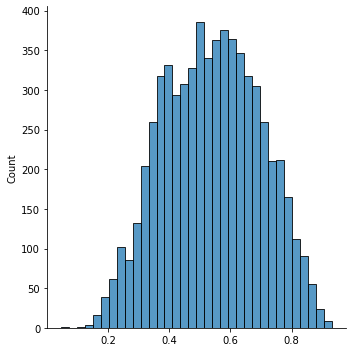

In [ ]:
y_pred_proba = logistic.predict_proba(X_test_ode)[:,1]
# 데이터의 class가 아닌 예측된 확률을 얻고자 한다면 
# .predict_proba() 함수에 동일한 파라미터를 전달하면 된다. 이 함수는 0 과 1 사이의 예측된 확률값을 반환
sns.displot(y_pred_proba)

In [ ]:
# roc_curve 
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.931963
1,0.000000,0.000178,0.931963
2,0.000000,0.003209,0.894017
3,0.001242,0.003209,0.893447
4,0.001242,0.004279,0.884772
...,...,...,...
2166,0.997516,0.999643,0.147429
2167,0.997516,0.999822,0.144499
2168,0.998758,0.999822,0.128630
2169,0.998758,1.000000,0.111494


idx: 1384 , threshold: 0.4430383851719751


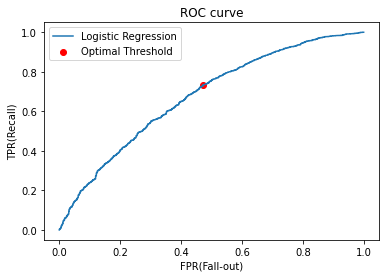

In [ ]:
# roc_curve -> 최적 임계값 구하기기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

optimal_fpr = roc[roc['Threshold'] == optimal_threshold]['FPR(Fall-out)']
optimal_tpr = roc[roc['Threshold'] == optimal_threshold]['TPR(Recall)']

plt.plot(fpr, tpr, label='Logistic Regression')

plt.scatter(optimal_fpr, optimal_tpr, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.22      0.53      0.31       805
           1       0.92      0.73      0.82      5609

    accuracy                           0.71      6414
   macro avg       0.57      0.63      0.56      6414
weighted avg       0.83      0.71      0.75      6414



## 1-2 naive over sampling
클래스 불균형 문제가 있다고 판단하여서 over sampling 진행 

In [ ]:
from imblearn.over_sampling import *
y = df_logistic['rebooking']
X = df_logistic.drop(['rebooking'], axis=1)

X_samp, y_samp = RandomOverSampler(random_state=42).fit_resample(X, y)

print(X_samp.shape)
print(y_samp.shape)

(45088, 9)
(45088,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp,  random_state=42, test_size = 0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (33816, 9)
X_test shape:  (11272, 9)


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

ode = OrdinalEncoder()

X_train_ode = ode.fit_transform(X_train)
X_test_ode = ode.transform(X_test)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train_ode, y_train)
y_test_pred = logistic.predict(X_test_ode)
print(f'train data 정확도 : {logistic.score(X_train_ode, y_train).round(2)}')
print(f'test data : {accuracy_score(y_test, y_test_pred).round(2)}')

train data 정확도 : 0.63
test data : 0.63


In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'accuracy : {accuracy.round(2)}')
print(f'precision : {precision.round(2)}')
print(f'recall : {recall.round(2)}')
print(f'f1 : {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      5592
           1       0.64      0.62      0.63      5680

    accuracy                           0.63     11272
   macro avg       0.63      0.63      0.63     11272
weighted avg       0.63      0.63      0.63     11272

accuracy : 0.63
precision : 0.64
recall : 0.62
f1 : 0.63


In [ ]:
y_pred_proba = logistic.predict_proba(X_test_ode)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.926006
1,0.000000,0.000176,0.926006
2,0.000000,0.000704,0.902946
3,0.000358,0.000704,0.898393
4,0.000358,0.003169,0.887956
...,...,...,...
3895,0.998569,0.999648,0.128619
3896,0.998569,0.999824,0.125937
3897,0.999106,0.999824,0.095957
3898,0.999106,1.000000,0.083153


idx: 2178 , threshold: 0.4697585473787555


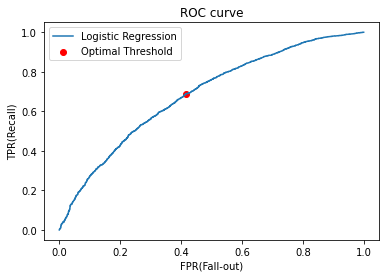

In [ ]:
# roc_curve -> 최적 임계값 구하기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

optimal_fpr = roc[roc['Threshold'] == optimal_threshold]['FPR(Fall-out)']
optimal_tpr = roc[roc['Threshold'] == optimal_threshold]['TPR(Recall)']

plt.plot(fpr, tpr, label='Logistic Regression')

plt.scatter(optimal_fpr, optimal_tpr, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62      5592
           1       0.63      0.69      0.66      5680

    accuracy                           0.64     11272
   macro avg       0.64      0.64      0.64     11272
weighted avg       0.64      0.64      0.64     11272



## 2-1 SMOTE

over sampling의 다른 유형인 SMOTE 방법 진행

In [ ]:
y = df_logistic['rebooking']
X = df_logistic.drop(['rebooking'], axis=1)

ode = OrdinalEncoder()

X_ode = ode.fit_transform(X)

X_samp, y_samp = SMOTE().fit_resample(X_ode, y)

print(X_samp.shape)
print(y_samp.shape)

(45088, 9)
(45088,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp,  random_state=42, test_size = 0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (33816, 9)
X_test shape:  (11272, 9)


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
logistic.fit(X_train, y_train)
y_test_pred = logistic.predict(X_test)
print(f'train data 정확도 : {logistic.score(X_train, y_train).round(2)}')
print(f'test data : {accuracy_score(y_test, y_test_pred).round(2)}')

train data 정확도 : 0.63
test data : 0.63


In [ ]:
print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'accuracy : {accuracy.round(2)}')
print(f'precision : {precision.round(2)}')
print(f'recall : {recall.round(2)}')
print(f'f1 : {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      5592
           1       0.64      0.62      0.63      5680

    accuracy                           0.63     11272
   macro avg       0.63      0.63      0.63     11272
weighted avg       0.63      0.63      0.63     11272

accuracy : 0.63
precision : 0.64
recall : 0.62
f1 : 0.63


In [ ]:
y_pred_proba = logistic.predict_proba(X_test_ode)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.018240,0.016021,1.000000
2,0.022711,0.022711,1.000000
3,0.025572,0.024824,1.000000
4,0.026824,0.027289,1.000000
...,...,...,...
3709,0.998748,0.998592,0.977642
3710,0.998748,0.999648,0.966734
3711,0.999106,0.999648,0.956645
3712,1.000000,0.999648,0.956168


idx: 1556 , threshold: 0.999999998902303


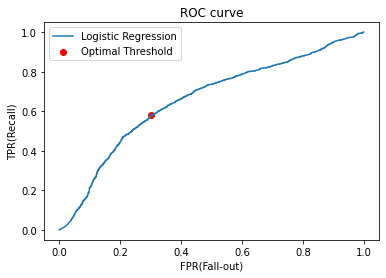

In [ ]:
# roc_curve -> 최적 임계값 구하기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

optimal_fpr = roc[roc['Threshold'] == optimal_threshold]['FPR(Fall-out)']
optimal_tpr = roc[roc['Threshold'] == optimal_threshold]['TPR(Recall)']

plt.plot(fpr, tpr, label='Logistic Regression')

plt.scatter(optimal_fpr, optimal_tpr, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66      5592
           1       0.66      0.58      0.62      5680

    accuracy                           0.64     11272
   macro avg       0.64      0.64      0.64     11272
weighted avg       0.64      0.64      0.64     11272



# 3. 램덤 포레스트

로지스틱 회귀 모델의 성능이 충분하지 않다고 판단하여서 랜덤 포레스트 모델도 로지스틱 회귀 모델과 같은 과정으로 진행<br/>

평가지표와 더불어 특성중요도 도출 <br/><br/>

가설 : 인천유나이티드 경기 예매 데이터를 통해 고객 그룹이 나이, 직업, 이전 경기 결과에 따라 재예매를 하는 데에 유의미한 차이를 보일 것이다

## 3-1 기본

In [ ]:
y = df_logistic['rebooking']
X = df_logistic.drop(['rebooking'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, test_size = 0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (19240, 9)
X_test shape:  (6414, 9)


In [ ]:
# 기준모델
from sklearn.metrics import accuracy_score

base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도 : {baseline_acc.round(2)}')

기준모델의 정확도 : 0.88


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

ode = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_ode = ode.fit_transform(X_train)
X_test_ode = ode.transform(X_test)

pipe_rf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(max_depth = 10, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train_ode, y_train)
print(f'train data 정확도 : {pipe_rf.score(X_train_ode, y_train).round(2)}')

train data 정확도 : 0.91


In [ ]:
from sklearn.metrics import classification_report

y_pred = pipe_rf.predict(X_test_ode)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy : {accuracy.round(2)}')
print(f'precision : {precision.round(2)}')
print(f'recall : {recall.round(2)}')
print(f'f1 : {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.63      0.25      0.36       805
           1       0.90      0.98      0.94      5609

    accuracy                           0.89      6414
   macro avg       0.77      0.61      0.65      6414
weighted avg       0.87      0.89      0.87      6414

accuracy : 0.89
precision : 0.9
recall : 0.98
f1 : 0.94


recall 평가지표를 기준으로 보았을 때 극단적인 점수가 나와 과적합을 의심 

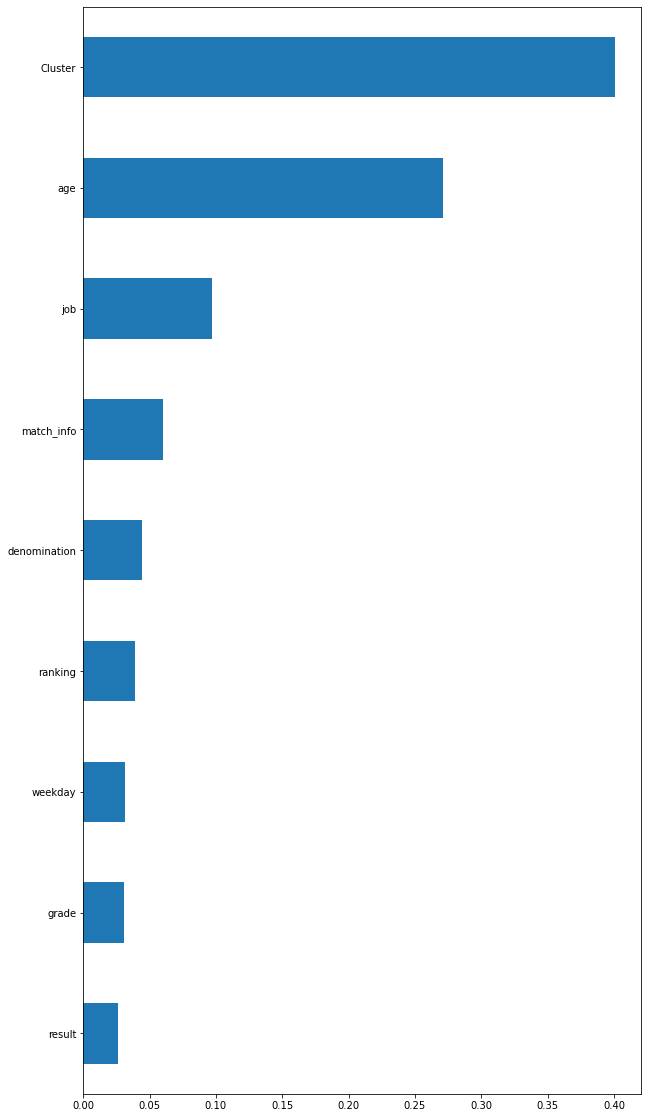

In [ ]:
# 특성 중요도
model_rf = pipe_rf.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

## 2-2 naive over sampling

클래스 분균형 문제와 기본 모델의 과적합을 해결하기 위해 naive over sampling 진행

In [ ]:
y = df_logistic['rebooking']
X = df_logistic.drop(['rebooking'], axis=1)

X_samp, y_samp = RandomOverSampler(random_state=42).fit_resample(X, y)

print(X_samp.shape)
print(y_samp.shape)

X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp,  random_state=42, test_size = 0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

(45088, 9)
(45088,)
X_train shape:  (33816, 9)
X_test shape:  (11272, 9)


In [ ]:
# 기준모델

base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도 : {baseline_acc.round(2)}')

기준모델의 정확도 : 0.5


In [ ]:
# scailing
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

ode = OrdinalEncoder()

X_train_ode = ode.fit_transform(X_train)
X_test_ode = ode.transform(X_test)

pipe_rf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(max_depth = 10, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train_ode, y_train)
print(f'train data 정확도 : {pipe_rf.score(X_train_ode, y_train).round(2)}')

train data 정확도 : 0.85


In [ ]:
from sklearn.metrics import classification_report

y_pred = pipe_rf.predict(X_test_ode)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy : {accuracy.round(2)}')
print(f'precision : {precision.round(2)}')
print(f'recall : {recall.round(2)}')
print(f'f1 : {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5592
           1       0.90      0.77      0.83      5680

    accuracy                           0.84     11272
   macro avg       0.85      0.84      0.84     11272
weighted avg       0.85      0.84      0.84     11272

accuracy : 0.84
precision : 0.9
recall : 0.77
f1 : 0.83


In [ ]:
# 예측 실행
# age, job, grade, denomination, ranking, match_info, result, weekday, Cluster
new_value = [[30, 7, 1, 1,	5, 2, 1, 6, 1]]
new_pred = logistic.predict(new_value)
print(new_pred)

[1]


기본 모델에 비해 과적합이 어느정도 해결된 결과

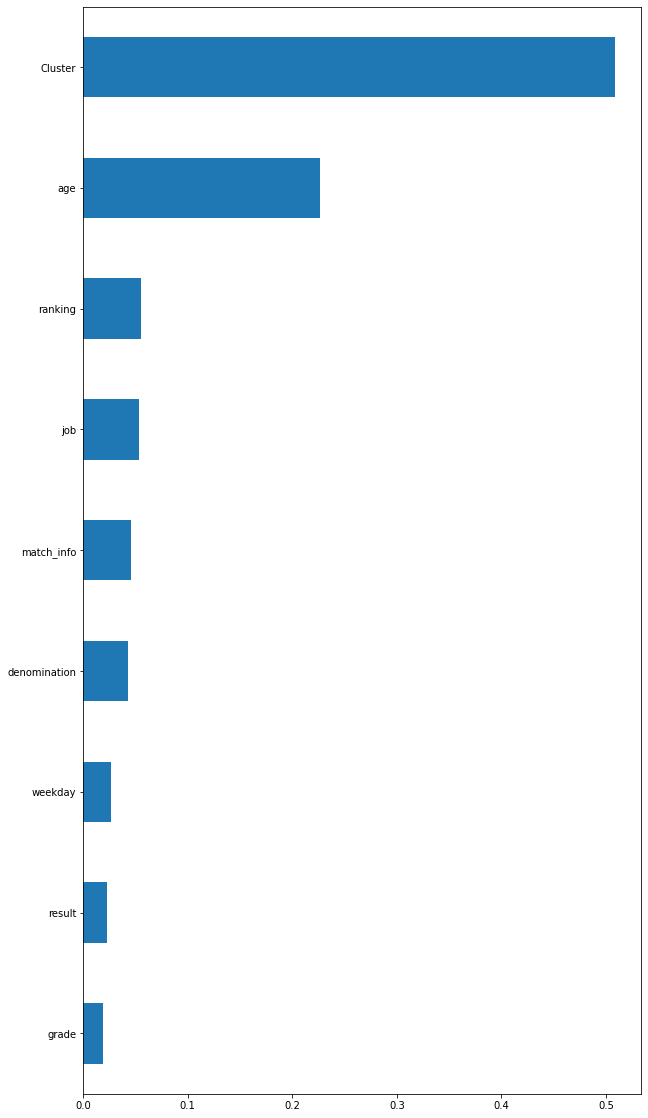

In [ ]:
# 특성 중요도
model_rf = pipe_rf.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

## 2-3 SMOTE

In [ ]:
y = df_logistic['rebooking']
X = df_logistic.drop(['rebooking'], axis=1)

ode = OrdinalEncoder()

X_ode = ode.fit_transform(X)

X_samp, y_samp = SMOTE().fit_resample(X_ode, y)

print(X_samp.shape)
print(y_samp.shape)

(45088, 9)
(45088,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp,  random_state=42, test_size = 0.25)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (33816, 9)
X_test shape:  (11272, 9)


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pipe_rf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(max_depth = 10, random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print(f'train data 정확도 : {pipe_rf.score(X_train, y_train).round(2)}')

train data 정확도 : 0.88


In [ ]:
y_pred = pipe_rf.predict(X_test_ode)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy : {accuracy.round(2)}')
print(f'precision : {precision.round(2)}')
print(f'recall : {recall.round(2)}')
print(f'f1 : {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.48      0.88      0.62      5592
           1       0.35      0.07      0.11      5680

    accuracy                           0.47     11272
   macro avg       0.42      0.47      0.37     11272
weighted avg       0.42      0.47      0.36     11272

accuracy : 0.47
precision : 0.35
recall : 0.07
f1 : 0.11
